In [60]:
import torch

import torch.nn as nn
import torch.nn.functional as F # Capas sin parametros
from torch.utils.data import Dataset, DataLoader

In [44]:
from google.colab import drive

In [45]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [58]:
import sys
import os

In [51]:
sys.path.append('/gdrive/MyDrive/Colab Notebooks/Pytorch/dl-pytorch')

In [59]:
from plot_helpers import imshow
from PIL import Image

## Capas de una red neuronal

In [53]:
linear = nn.Linear(in_features=4096, out_features=10) 
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1, padding=1)
relu = nn.ReLU(False) # Convierte los números negativos a cero

In [54]:
x = torch.randn(4096)
y = linear(x)
y.size()

torch.Size([10])

In [55]:
x = torch.randn([1,3,7,7])
y = conv(x)
z = relu(y)

In [56]:
for name, p in linear.named_parameters():
  print(name) 
  print(p.size())
  print()

weight
torch.Size([10, 4096])

bias
torch.Size([10])



## Red Neuronal

In [57]:
class Net(nn.Module):
  def __init__(self, num_channels):
    super(Net, self).__init__()

    self.num_channels = num_channels

    self.conv1 = nn.Conv2d(3,self.num_channels, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(self.num_channels, (self.num_channels*2), kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d((self.num_channels*2), (self.num_channels*4), kernel_size=3, stride=1, padding=1)
    
    self.fc1 = nn.Linear(self.num_channels * 4 * 8 * 8, self.num_channels * 4)
    self.fc2 = nn.Linear(self.num_channels * 4, 6)

  def forward(self, x):
    # Empieza con una imagen de 3 caneles de 64x64 pixeles
    x = self.conv1(x) # Num channels * 64 * 64
    x = F.relu(F.max_pool2d(x, 2)) # Num channels * 32 * 32
    x = self.conv2(x) # (Num channels * 2) * 32 * 32
    x = F.relu(F.max_pool2d(x, 2)) # (Num channels * 2) * 16 * 16
    x = self.conv3(x) # (Num channels * 4) * 16 * 16
    x = F.relu(F.max_pool2d(x, 2)) # (Num channels * 4) * 8 * 8

    # flatten
    x = x.view(-1, self.num_channels * 4 * 8 * 8)

    # Full connected
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)

    # Log softmax
    x = F.log_softmax(x, dim=1)
    
    return (x)

## Datos

In [61]:
class SIGNSDatasets(Dataset):
  def __init__(self, base_dir, split='train', transform=None):
    path = os.path.join(base_dir, f'{split}_signs')
    files = os.listdir(path)
    
    self.filesname = [os.path.join(path, f) for f in files if f.endswith('.jpg')]
    self.targets = [int(f[0]) for f in files]
    self.transform = transform

  def __len__(self):
    return (len(self.filesname))

  def __getitem__(self, index):
    image = Image.open(self.filesname[index])

    if self.transform:
      image = self.transform(image)
    
    return (image, self.targets[index])

In [64]:
signs = SIGNSDatasets('/gdrive/My Drive/Colab Notebooks/Pytorch/64x64_SIGNS', split='train')

In [66]:
signs.__getitem__(1)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7F7B47A3BA50>,
 1)

In [82]:
len(signs)

864

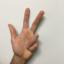

In [88]:
signs[70][0]